# (ADA) Homework 1: Scoring the Language Model Olympics

---

By the end of this homework, we expect you to be able to:

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Create meaningful visualizations to analyze the data;
- Communicate your findings in a clear and concise manner

---

**Important Dates.**

- Homework release: Fri 04 Oct 2024
- Homework due: Sat 18 Oct 2024, 23:59
- Grade release: Mon 04 Nov 2024

**Some rules**

- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
- Make sure you use the data folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
- Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.
- For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).
- Back up any hypotheses and claims with data, since this is an important aspect of the course.
- Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. If there are multiple notebooks present, we will not grade anything.
- We will not run your notebook for you! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a fully-run and evaluated notebook. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

**A Note on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating. Fortunately, our job is not to police, but rather to educate! So, please consider the following:
- Presumably, you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!
- Some of the TAs on this course literally published many works on detecting machine-generated text.
---

## Context

Context
AI is booming! Newspapers, influencers, and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future looks like…

Freshly graduated from the EPFL, you are hired by the Swiss government to advise on a large-scale “AI integration” initiative code-named **"NEUTRALITY"** (Navigating Efficient Upgrades Through Robust Artificial Learning Integration Techniques Yearly). Convinced by the stunning progress in language modeling, the government would like to battle the growing shortages in the education sector by using LMs. Your job description: investigate which LMs might be best suited!

You are given the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, Horta-Ribeiro, the intern responsible for collecting the results, didn’t take EPFL’s famous ADA course. As a result, the collected datasets are slightly corrupted.

### A very brief primer on Language Models
Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project NEUTRALITY’s objectives:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 PROJECT_NEUTRALITY
│
├── 📄 analysis.ipynb (the file you're currently reading!)
├── 📄 requirements.txt (install into your environment)
│
├── 📁 task_1
├── 📁 task_2
└── 📁 task_2.5
```   
 

In [1]:
# please make sure you install the packages listed in the requirements.txt file in your environment!
# using pip
# pip install -r requirements.txt
#
# using Conda:
# conda create --name <env_name> --file requirements.txt
#
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind

## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [2]:
df_test = pd.read_csv('task_1/mmlu_data/test.csv')
df_x = pd.read_csv('task_1/lm_scores/lm_X.csv')
df_y = pd.read_csv('task_1/lm_scores/lm_Y.csv')
df_z = pd.read_csv('task_1/lm_scores/lm_Z.csv')

print('Size test: ',df_test.shape)
print('Size x: ',df_x.shape)
print('Size y: ',df_y.shape)
print('Size z: ',df_z.shape)

Size test:  (14042, 8)
Size x:  (13882, 2)
Size y:  (13978, 2)
Size z:  (13923, 2)


### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

In [3]:
# A
print('For x: ',df_x['result'].value_counts())
print('For y: ',df_y['result'].value_counts())
print('For z: ',df_z['result'].value_counts())

For x:  result
A                                                                                                                 2733
A                                                                                                                 1657
B                                                                                                                 1412
Answer: A                                                                                                         1398
C                                                                                                                 1134
                                                                                                                  ... 
judicial activism, so the answer is A                                                                                1
creating insurmountable obstacles to the founding of factions, so the answer is A                                    1
A congressperson who retires to t

B. Regarding to the expected values (A,B,C,D), we see lot of answers which are in the wrong format like :
- 'Answer: A'
- sentence answer
- None sure, None of the above
- typo error ('A-' != 'A')

### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

In [4]:
# A
# Copy of the dataframes
df_xc = df_test.copy()
df_yc = df_test.copy()
df_zc = df_test.copy()

# Filter the dataframes where result is less than 10 characters
df_xc = df_x[df_x['result'].str.len() < 10]
df_yc = df_y[df_y['result'].str.len() < 10]
df_zc = df_z[df_z['result'].str.len() < 10]

In [5]:
# B
def clean_answer(s):
    s = str(s)
    L=['A', 'B', 'C', 'D'] # All the correct answers
    new_X = ''
    X = s.split() # Tokenize the answer
    for x in X: # Check if the answer is in the list of correct answers
        if x in L:
            new_X = x
    return new_X

df_xc.result = df_xc.result.apply(lambda x: clean_answer(x)) # Filter the answers
df_xc = df_xc[df_xc.result.apply(lambda x : len(str(x)) > 0)] # Remove empty answers

df_yc.result = df_yc.result.apply(lambda x: clean_answer(x))
df_yc = df_yc[df_yc.result.apply(lambda x : len(str(x)) > 0)]

df_zc.result = df_zc.result.apply(lambda x: clean_answer(x))
df_zc = df_zc[df_zc.result.apply(lambda x : len(str(x)) > 0)]

print('values of X_copy', df_xc.result.value_counts())
print('values of Y_copy', df_yc.result.value_counts())
print('values of Z_copy', df_zc.result.value_counts())

values of X_copy result
A    5788
B    2965
C    2350
D    2333
Name: count, dtype: int64
values of Y_copy result
D    5757
C    3242
B    2519
A    2033
Name: count, dtype: int64
values of Z_copy result
D    3348
C    3255
B    3124
A    3026
Name: count, dtype: int64
size of X_copy (13436, 2)
size of Y_copy (13551, 2)
size of Z_copy (12753, 2)


C:\Users\arnau\AppData\Local\Temp\ipykernel_23816\1547271188.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xc.result = df_xc.result.apply(lambda x: clean_answer(x)) # Filter the answers
C:\Users\arnau\AppData\Local\Temp\ipykernel_23816\1547271188.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yc.result = df_yc.result.apply(lambda x: clean_answer(x))
C:\Users\arnau\AppData\Local\Temp\ipykernel_23816\1547271188.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [8]:
# Change of size
print('Shape of x,x_copy: ',df_x.shape, df_xc.shape)
print('Shape of y,y_copy: ',df_y.shape, df_yc.shape)
print('Shape of z,z_copy: ',df_z.shape, df_zc.shape)


Shape of x,x_copy:  (13882, 2) (13436, 2)
Shape of y,y_copy:  (13978, 2) (13551, 2)
Shape of z,z_copy:  (13923, 2) (12753, 2)


C. We have lost some of the original data. It might be a problem if we loose to much rows, the further analysis wouldn't be representative of the original dataset. However, the cleaning is necessary to exploit the data. We can notice that in our case, we only loose approximately 3% of the data, which is not a big deal.

### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

In [11]:
# A
df_xc_test = pd.merge(df_test, df_xc, on='question_id', how='inner')
df_yc_test = pd.merge(df_test, df_yc, on='question_id', how='inner')
df_zc_test = pd.merge(df_test, df_zc, on='question_id', how='inner')

In [17]:
# B
df_xc_test['correct'] = 1*(df_xc_test['result'] == df_xc_test['answer'])
df_yc_test['correct'] = 1*(df_yc_test['result'] == df_yc_test['answer'])
df_zc_test['correct'] = 1*(df_zc_test['result'] == df_zc_test['answer'])

print('Average score x :', round(df_xc_test['correct'].mean()*100,2),'%')
print('Average score y :', round(df_yc_test['correct'].mean()*100,2),'%')
print('Average score z :', round(df_zc_test['correct'].mean()*100,2),'%')

Average score x : 76.75 %
Average score y : 74.58 %
Average score z : 66.33 %


The average score seems to differ from one model to another.

### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X since: (200 - 181) / 181 > 0.10

In [23]:
# A
# For each model we get the number of questions per subject
sub_x = df_xc_test.groupby('subject').size()
sub_y = df_yc_test.groupby('subject').size()
sub_z = df_zc_test.groupby('subject').size()
df_res = pd.DataFrame({'x': sub_x, 'y': sub_y, 'z': sub_z}) # concatenate the results in a single dataframe

# Compute the ratio
df_res["x/y"] = abs(df_res["x"]-df_res["y"])/np.minimum(df_res["x"],df_res["y"])
df_res["x/z"] = abs(df_res["x"]-df_res["z"])/np.minimum(df_res["x"],df_res["z"])
df_res["y/z"] = abs(df_res["y"]-df_res["z"])/np.minimum(df_res["y"],df_res["z"])

# Filter subject where at least one of the ratio is greater than 0.1
test = df_res[(df_res["x/y"] > 0.1) |  (df_res["x/z"] > 0.1) | (df_res["y/z"] > 0.1)]

test

,x,y,z,x/y,x/z,y/z
subject,,,,,,
college chemistry,96,98,84,0.020833,0.142857,0.166667
college computer science,97,98,84,0.010309,0.154762,0.166667
computer security,95,98,87,0.031579,0.091954,0.126437
formal logic,109,123,113,0.128440,0.036697,0.088496
high school geography,195,193,176,0.010363,0.107955,0.096591
logical fallacies,154,136,147,0.132353,0.047619,0.080882
medical genetics,97,98,89,0.010309,0.089888,0.101124
moral disputes,329,304,250,0.082237,0.316000,0.216000
moral scenarios,737,865,774,0.173677,0.050204,0.117571


In [53]:
# B
df_xc_test_rebalanced = pd.DataFrame()
df_yc_test_rebalanced = pd.DataFrame()
df_zc_test_rebalanced = pd.DataFrame()

# Per subject, we get the minimum number of questions answered by a model
for sub in df_xc_test['subject'].unique():
    min_count = int(df_res.loc[sub][['x','y','z']].min())
    
    # For each model, keep only a random sample of the minimum number of questions
    df_xc_test_sample = df_xc_test[df_xc_test['subject'] == sub].sample(min_count)
    df_yc_test_sample = df_yc_test[df_yc_test['subject'] == sub].sample(min_count)
    df_zc_test_sample = df_zc_test[df_zc_test['subject'] == sub].sample(min_count)
    
    # Add them to the final dataframe
    df_xc_test_rebalanced = pd.concat([df_xc_test_rebalanced, df_xc_test_sample])
    df_yc_test_rebalanced = pd.concat([df_yc_test_rebalanced, df_yc_test_sample])
    df_zc_test_rebalanced = pd.concat([df_zc_test_rebalanced, df_zc_test_sample])


In [55]:
# C
print('Average score x :', round(df_xc_test_rebalanced['correct'].mean()*100,2),'%')
print('Average score y :', round(df_yc_test_rebalanced['correct'].mean()*100,2),'%')
print('Average score z :', round(df_zc_test_rebalanced['correct'].mean()*100,2),'%')


Average score x : 76.7 %
Average score y : 74.55 %
Average score z : 66.3 %


## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's NEUTRALITY project. Ms. Sakota is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, she orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [56]:
# PROVIDED CODE
df_mmlu = pd.read_csv('task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('task_2/lm_scores_other.csv')

### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

In [57]:
# A
# Compute the mean
x_mmlu_mean = df_mmlu[df_mmlu['model_name'] == 'X']['correct'].mean()
y_mmlu_mean = df_mmlu[df_mmlu['model_name'] == 'Y']['correct'].mean()
z_mmlu_mean = df_mmlu[df_mmlu['model_name'] == 'Z']['correct'].mean()

x_other_mean = df_other[df_other['model_name'] == 'X']['correct'].mean()
y_other_mean = df_other[df_other['model_name'] == 'Y']['correct'].mean()
z_other_mean = df_other[df_other['model_name'] == 'Z']['correct'].mean()

# Compute the standard error (std/sqrt(n))
x_mmlu_ste = df_mmlu[df_mmlu['model_name'] == 'X']['correct'].std()/np.sqrt(df_mmlu[df_mmlu['model_name'] == 'X']['correct'].count())
y_mmlu_ste = df_mmlu[df_mmlu['model_name'] == 'Y']['correct'].std()/np.sqrt(df_mmlu[df_mmlu['model_name'] == 'Y']['correct'].count())
z_mmlu_ste = df_mmlu[df_mmlu['model_name'] == 'Z']['correct'].std()/np.sqrt(df_mmlu[df_mmlu['model_name'] == 'Z']['correct'].count())

x_other_ste = df_other[df_other['model_name'] == 'X']['correct'].std()/np.sqrt(df_other[df_other['model_name'] == 'X']['correct'].count())
y_other_ste = df_other[df_other['model_name'] == 'Y']['correct'].std()/np.sqrt(df_other[df_other['model_name'] == 'Y']['correct'].count())
z_other_ste = df_other[df_other['model_name'] == 'Z']['correct'].std()/np.sqrt(df_other[df_other['model_name'] == 'Z']['correct'].count())

df_results = pd.DataFrame({'model': ['X', 'Y', 'Z']})
df_results['mmlu_mean'] = [x_mmlu_mean, y_mmlu_mean, z_mmlu_mean]
df_results['mmlu_ste'] = [x_mmlu_ste, y_mmlu_ste, z_mmlu_ste]
df_results['other_mean'] = [x_other_mean, y_other_mean, z_other_mean]
df_results['other_ste'] = [x_other_ste, y_other_ste, z_other_ste]

df_results

,model,mmlu_mean,mmlu_ste,other_mean,other_ste
0,X,0.743588,0.004038,0.787976,0.006668
1,Y,0.761542,0.003941,0.720936,0.007317
2,Z,0.655951,0.004393,0.671721,0.007660


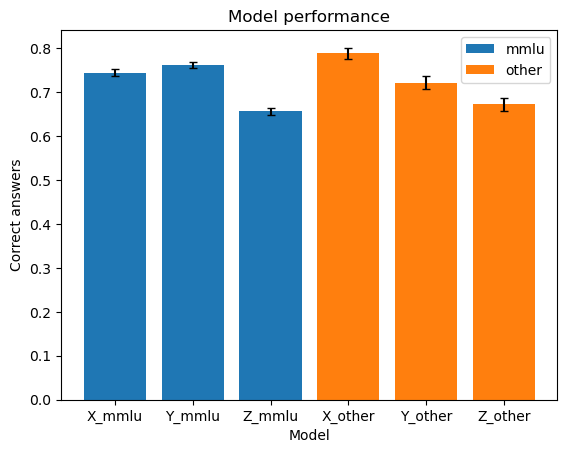

In [60]:
# B
# Compute the CI interval
ic_x_mmlu = 1.96*x_mmlu_ste
ic_y_mmlu = 1.96*y_mmlu_ste
ic_z_mmlu = 1.96*z_mmlu_ste

ic_x_other = 1.96*x_other_ste
ic_y_other = 1.96*y_other_ste
ic_z_other = 1.96*z_other_ste

df_results['mmlu_ic'] = [ic_x_mmlu, ic_y_mmlu, ic_z_mmlu]
df_results['other_ic'] = [ic_x_other, ic_y_other, ic_z_other]

# Barplot for x_mmlu, y_mmlu, z_mmlu, x_other, y_other, z_other and IC intervals
plt.bar(df_results['model'] + '_mmlu', df_results['mmlu_mean'], yerr=df_results['mmlu_ic'], label='mmlu', capsize=3)
plt.bar(df_results['model'] + '_other', df_results['other_mean'], yerr=df_results['other_ic'], label='other', capsize=3)
plt.legend()
plt.title('Model performance')
plt.xlabel('Model')
plt.ylabel('Correct answers')
plt.show()

C.

(i) As we see in the previous barplot, it is difficult to say which model is the best. But we can assume that Z model is less efficient compared to the others regarding the 95% confidence interval.

(ii) From one dataset of questions to the other, we see that the same model has different accuracy. The 95% confidence interval don't overlap between the two datasets. It seems odd, it might be due to a different difficulty of questions between the two datasets.

### 2.2 (5 pt)

Ms. Sakota has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

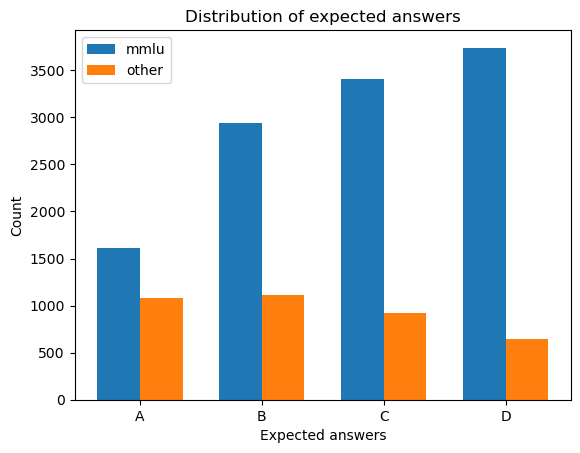

In [72]:
# A
answer_mmlu = df_mmlu['answer'].value_counts() / 3 # Divided by 3 because there are 3 models
answer_other = df_other['answer'].value_counts() / 3

answer_mmlu = answer_mmlu.sort_index()
answer_other = answer_other.sort_index()

# Graph parameters
indices = np.arange(len(answer_mmlu))
width = 0.35

# Barplot of the count of expected answers
plt.bar(indices - width/2, answer_mmlu.values, width, label='mmlu')
plt.bar(indices + width/2, answer_other.values, width, label='other')
plt.xticks(indices, answer_mmlu.index)
plt.title('Distribution of expected answers')
plt.xlabel('Expected answers')
plt.ylabel('Count')
plt.legend()
plt.show()

In [80]:
# B
from scipy.stats import chi2_contingency
answer_dist = [answer_mmlu.values, answer_other.values]
answer_dist = np.array(answer_dist) # contains the count of expected answers by dataset
chi2_contingency(answer_dist)

Chi2ContingencyResult(statistic=629.3958675644751, pvalue=4.270849602795191e-136, dof=3, expected_freq=array([[2034.97534778, 3071.76085409, 3274.5772889 , 3314.68650922],
       [ 654.02465222,  987.23914591, 1052.4227111 , 1065.31349078]]))

B. We compute a chi2 test of independence. The null hypothesis states that the variables are independant, i.e. the distribution doesn't depend on the dataset. The alternative hypothesis states that the variables are dependant, i.e. the distribution depends on the dataset. The p-value is less than 0.05, so we reject the null hypothesis. The distribution of correct answers is significantly different between the two datasets.

### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

In [84]:
# A
# Grouped by answer and filtered by model X
mean_accuracy_x_mmlu = df_mmlu[df_mmlu['model_name'] == 'X'].groupby('answer')['correct'].mean()
mean_accuracy_x_other = df_other[df_other['model_name'] == 'X'].groupby('answer')['correct'].mean()

df_res_accuracy = pd.DataFrame({'result': mean_accuracy_x_mmlu.index})
df_res_accuracy['mmlu'] = mean_accuracy_x_mmlu.values
df_res_accuracy['other'] = mean_accuracy_x_other.values
df_res_accuracy

,result,mmlu,other
0,A,0.972688,0.974026
1,B,0.799185,0.806452
2,C,0.707905,0.676407
3,D,0.633592,0.603744


In [86]:
# B
ttest_ind(df_mmlu[(df_mmlu['model_name'] == 'X') & (df_mmlu['answer'] == 'A')]['correct'], 
          df_other[(df_other['model_name'] == 'X') & (df_other['answer'] == 'A')]['correct'])

TtestResult(statistic=-0.21059510911432247, pvalue=0.8332191972699248, df=2687.0)

B. Using the t-test computed before, since pvalue is greater than 0.05, we can't reject the null hypothesis. This means that the mean accuracy of LM X when the correct answer is "A" is independant of the dataset.

In [89]:
# C
# MMLU
print(ttest_ind(df_mmlu[(df_mmlu['model_name'] == 'X') & (df_mmlu['answer'] == 'A')]['correct'], 
          df_mmlu[(df_mmlu['model_name'] == 'X') & (df_mmlu['answer'].isin(['C', 'D']))]['correct']))

# Other
print(ttest_ind(df_other[(df_other['model_name'] == 'X') & (df_other['answer'] == 'A')]['correct'], 
          df_other[(df_other['model_name'] == 'X') & (df_other['answer'].isin(['C', 'D']))]['correct']))



TtestResult(statistic=25.556410645761325, pvalue=5.334906497224946e-139, df=8751.0)
TtestResult(statistic=21.66703250957516, pvalue=5.900859805611251e-96, df=2641.0)


C. Using the t-test computed before, since pvalue is less than 0.05, we reject the null hypothesis. This means that the mean accuracy of LM X depends on whether the correct answer is "A" or "C or D". We notice that this property is true for both datasets.

### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

In [90]:
# A
# MMLU
mean_accuracy_x_mmlu = df_mmlu[df_mmlu['model_name'] == 'X'].groupby('answer')['correct'].mean()
mean_accuracy_y_mmlu = df_mmlu[df_mmlu['model_name'] == 'Y'].groupby('answer')['correct'].mean()
mean_accuracy_z_mmlu = df_mmlu[df_mmlu['model_name'] == 'Z'].groupby('answer')['correct'].mean()

# Other
mean_accuracy_x_other = df_other[df_other['model_name'] == 'X'].groupby('answer')['correct'].mean()
mean_accuracy_y_other = df_other[df_other['model_name'] == 'Y'].groupby('answer')['correct'].mean()
mean_accuracy_z_other = df_other[df_other['model_name'] == 'Z'].groupby('answer')['correct'].mean()

# Create a dataframe with the results
df_mean_accurracy = pd.DataFrame({'subject': mean_accuracy_x_mmlu.index})
df_mean_accurracy['x_mmlu'] = mean_accuracy_x_mmlu.values
df_mean_accurracy['y_mmlu'] = mean_accuracy_y_mmlu.values
df_mean_accurracy['z_mmlu'] = mean_accuracy_z_mmlu.values
df_mean_accurracy['x_other'] = mean_accuracy_x_other.values
df_mean_accurracy['y_other'] = mean_accuracy_y_other.values
df_mean_accurracy['z_other'] = mean_accuracy_z_other.values

df_mean_accurracy

,subject,x_mmlu,y_mmlu,z_mmlu,x_other,y_other,z_other
0,A,0.972688,0.623836,0.643079,0.974026,0.625232,0.680891
1,B,0.799185,0.688073,0.641182,0.806452,0.663978,0.667563
2,C,0.707905,0.733470,0.669115,0.676407,0.762987,0.662338
3,D,0.633592,0.904252,0.661139,0.603744,0.920437,0.677067


B. Regarding the different mean accuracy scores, it confirms our previous observations: Z is less accurate. Moreover we observe that Z model accuracy is less dependant on the correct answer compared to the other models. X and Y models seem to be influenced by the correct answer.

### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Ms. Sakota. After thinking it over, Ms. Sakota concludes that more tests are needed. She orders a second round of MMLU results. However, the clever Ms. Sakota thinks of the following twist: while keeping questions fixed, she randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Ms. Sakota do this?

Since we previously observed that the accuracy may depend on the correct answer, it would be interesting to change the position. By permuting randomly the position of the correct answer, Ms. Sakota wants to check if the models use the position of the correct answer to predict the right answer. If it is not the case, the models should have the same accuracy as before.

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

Knowing that M is the number of shuffles, M is 1 in our case.

In [92]:
df_mmlu_shuffle = pd.read_csv('task_2_5/lm_scores_mmlu_shuffle.csv')

In [96]:
# Function to compute the test-retest score
def model_test_retest(model):
    test_retest = 0
    df_mmlu_model = df_mmlu[df_mmlu['model_name'] == model] # filter the model
    df_mmlu_shuffle_model = df_mmlu_shuffle[df_mmlu_shuffle['model_name'] == model] # filter the model
    N = df_mmlu_model.shape[0] # get the number of questions
    for q_id in df_mmlu_model['question_id'].unique():
        test_retest += 1*df_mmlu_model[df_mmlu_model['question_id'] == q_id]['correct'].values[0]*df_mmlu_shuffle_model[df_mmlu_shuffle_model['question_id'] == q_id]['correct'].values[0]
    return test_retest/N

test_retest_x = model_test_retest('X')
test_retest_y = model_test_retest('Y')
test_retest_z = model_test_retest('Z')

print('Test-retest X:', test_retest_x)
print('Test-retest Y:', test_retest_y)
print('Test-retest Z:', test_retest_z)

Test-retest X: 0.588406292749658
Test-retest Y: 0.5716484268125855
Test-retest Z: 0.44160396716826267


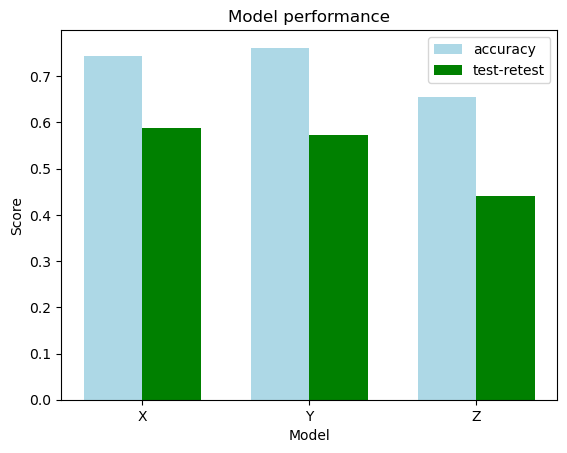

In [125]:
# Barplot of accuracy and test-retest
df_mean_test_retest = pd.DataFrame({'model': ['X', 'Y', 'Z']})
df_mean_test_retest['accuracy'] = df_mmlu.groupby('model_name')['correct'].mean().values
df_mean_test_retest['test_retest'] = [test_retest_x, test_retest_y, test_retest_z]

# Graph parameters
indices = np.arange(len(df_mean_test_retest))
width = 0.35

# Barplot of the count of expected answers
for i in range(df_mean_test_retest.shape[0]):
    plt.bar(indices - width/2, df_mean_test_retest['accuracy'], width, label='accuracy', color='lightblue')
    plt.bar(indices + width/2, df_mean_test_retest['test_retest'], width, label='test-retest', color='green')
    plt.xticks(indices, df_mean_test_retest['model'])
    if i==0:
        plt.legend()
plt.title('Model performance')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()

On the previous plot, the left bar of each model represents the initial accuracy and the right bar represents the proportion of questions which stay true after one shuffle.
We can interpret that the difference between both is coming from the answers that were influenced by the position of the correct answer.

### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

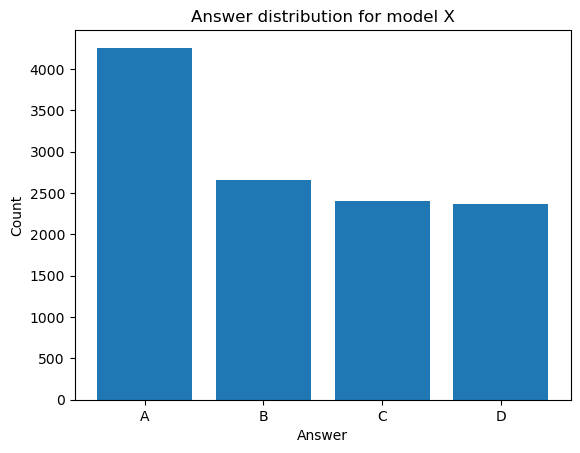

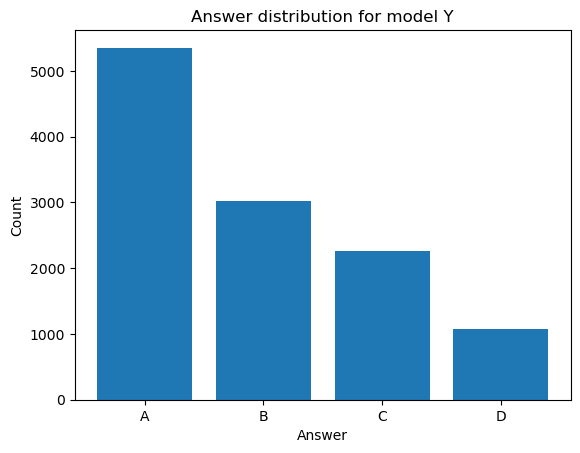

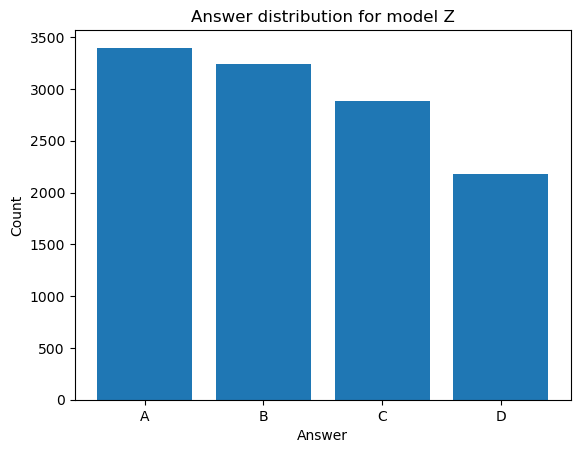

In [135]:
# A
for model in ['X','Y','Z']:
    df_mmlu_model = df_mmlu[df_mmlu['model_name'] == model] # Filter the model
    plt.bar(df_mmlu_model['result'].value_counts().index.sort_values(), df_mmlu_model['result'].value_counts().values)
    plt.title('Answer distribution for model ' + model)
    plt.xlabel('Answer')
    plt.ylabel('Count')
    plt.show()
        

In [136]:
# A
# Accuracy conditioned on the answer
df_mmlu.groupby(['model_name', 'result'])[['correct']].mean()

correct
model_name result          
X          A       0.367927
           B       0.884543
           C       1.000000
           D       1.000000
Y          A       0.937500
           B       0.897606
           C       0.827861
           D       0.631608
Z          A       0.476103
           B       0.654073
           C       0.703429
           D       0.727487

B. 
(i) We observe that models X and Y choose 'A' more often. Moreover, we notice that the model X answers C or D only when it is sure that it is the correct answer. 

(ii) We observe that the 3 models rarely choose 'D' as an answer. However, D is the most frequent correct answer. (cf 2.2)

(Bonus) We can guess that for each question, the model ouputs a probability for each answer to be true. Then, the model chooses the answer considering a threshold specific for each answer. For instance in model X, we guess that the thresholds for answers C and D are very high while it is very low for A. This could explain the very performant accuracy of answers C and D in model X and the very low accuracy of answer A in model X.

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage in the West, _Westoda_:

```
"Hmm, correct you are, young padawan, to question how the world is seen by large language models! Simple 'text' it is not, hmm? No, no, no! Characters and words, the way of puny humans, this is not, heh heh heh.

'Tokens', they use, yes! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z'. Chunky blocks of text, they become, yes! 'Hello world', a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, yes! Confusing, it is, hmm?

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.
Meditate on this, you should. The force of natural language processing, strong it is. But patience, you must have, my young padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Yes, hmmm!"
```

Admittingly, Westoda at times speaks in riddles… However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [153]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    !pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

humans see: "hello world" --> language models see: [24912, 2375]


### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

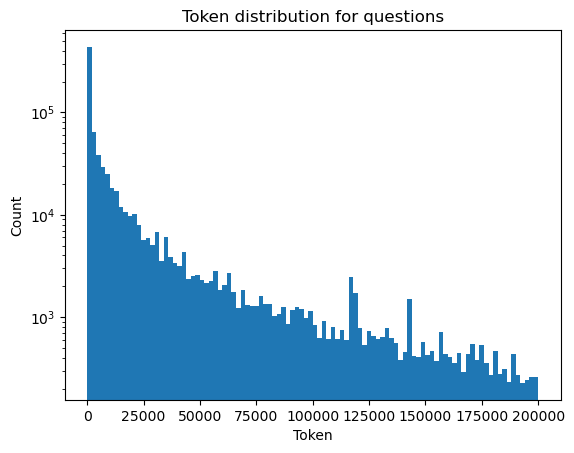

In [157]:
# A
# Tokenize the questions
tokenized_question = df_test['question'].apply(lambda x: tokenize_text(x))
# Flatten the list
flatten_question_token = [item for sublist in tokenized_question for item in sublist]

plt.hist(flatten_question_token, bins=100)
plt.yscale('log')
plt.title('Token distribution for questions')
plt.xlabel('Token')
plt.ylabel('Count')
plt.show()

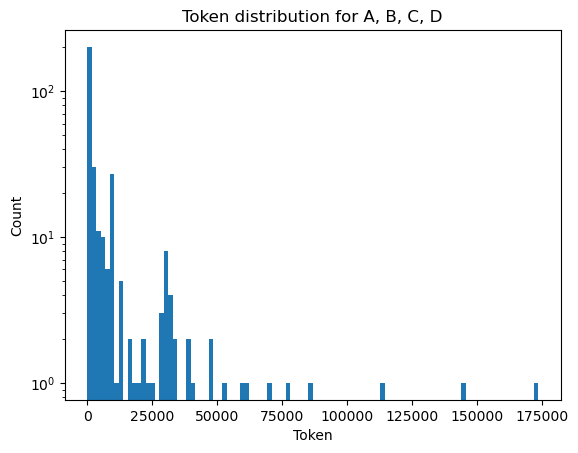

In [158]:
# B
# Tokenize the answers
tokenized_answers = df_test[['A','B','C','D']].apply(lambda x: tokenize_text(x))
# Flatten the list
flatten_answer_token = [item for sublist in tokenized_answers for item in sublist]

plt.hist(flatten_answer_token,bins=100)
plt.yscale('log')
plt.title('Token distribution for A, B, C, D')
plt.xlabel('Token')
plt.ylabel('Count')
plt.show()

In [162]:
# C
token_list = [tokenize_text(s) for s in ['A', 'B', 'C', 'D']]
token_list = [item for sublist in token_list for item in sublist]
tokenized_A = df_test['A'].apply(lambda x: tokenize_text(x))
tokenized_B = df_test['B'].apply(lambda x: tokenize_text(x))
tokenized_C = df_test['C'].apply(lambda x: tokenize_text(x))
tokenized_D = df_test['D'].apply(lambda x: tokenize_text(x))

# As discuss on Ed, we concatenate question and answers tokens
tokenized_question_answers = tokenized_question + tokenized_A + tokenized_B + tokenized_C + tokenized_D
df_token_count = pd.DataFrame({'String':['A','B','C','D'],'token': token_list})

# For each searched token
for token in token_list:
    count = 0
    for tokens in tokenized_question_answers: # for each pair of question-answers
        if token in tokens:
            count += 1
    df_token_count.loc[df_token_count['token'] == token, 'count'] = count
    
# Compute the frequency relatively to the other tokens
df_token_count['frequency'] = df_token_count['count']/df_token_count['count'].sum()
df_token_count

,String,token,count,frequency
0,A,32,2689.0,0.804367
1,B,33,183.0,0.054741
2,C,34,302.0,0.090338
3,D,35,169.0,0.050553


### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each combined question-answers pair, compute: 
1. the number of "A", "B", "C", and "D" tokens; and
2. the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


In [169]:
# A
df_test_token = df_test.copy()

# Create new columns with the tokenized text
df_test_token['question_token'] = df_test_token['question'].apply(lambda x: tokenize_text(x))
df_test_token['A_token'] = df_test_token['A'].apply(lambda x: tokenize_text(x))
df_test_token['B_token'] = df_test_token['B'].apply(lambda x: tokenize_text(x))
df_test_token['C_token'] = df_test_token['C'].apply(lambda x: tokenize_text(x))
df_test_token['D_token'] = df_test_token['D'].apply(lambda x: tokenize_text(x))

# Create new column with the concatenation of the tokens (question-answers pair)
df_test_token['question_answer_token'] = df_test_token['question_token'] + df_test_token['A_token'] + df_test_token['B_token'] + df_test_token['C_token'] + df_test_token['D_token']

# Compute the number of each searched token in each question-answers pair
df_test_token['count_A'] = df_test_token['question_answer_token'].apply(lambda x: x.count(token_list[0]))
df_test_token['count_B'] = df_test_token['question_answer_token'].apply(lambda x: x.count(token_list[1]))
df_test_token['count_C'] = df_test_token['question_answer_token'].apply(lambda x: x.count(token_list[2]))
df_test_token['count_D'] = df_test_token['question_answer_token'].apply(lambda x: x.count(token_list[3]))
df_test_token['total_number_tokens'] = df_test_token['question_answer_token'].apply(lambda x: len(x))

# Compute the frequency of each searched token
df_test_token['frequency_A'] = df_test_token['count_A']/df_test_token['total_number_tokens']
df_test_token['frequency_B'] = df_test_token['count_B']/df_test_token['total_number_tokens']
df_test_token['frequency_C'] = df_test_token['count_C']/df_test_token['total_number_tokens']
df_test_token['frequency_D'] = df_test_token['count_D']/df_test_token['total_number_tokens']

# Group by "correct" answer and compute the mean frequency of A, B, C and D and the total number of tokens
df_test_token.groupby('answer')[['frequency_A', 'frequency_B', 'frequency_C', 'frequency_D', 'total_number_tokens']].mean()

,frequency_A,frequency_B,frequency_C,frequency_D,total_number_tokens
answer,,,,,
A,0.003267,0.000414,0.000451,0.000294,93.208566
B,0.002916,0.000400,0.000556,0.000299,88.863951
C,0.002794,0.000341,0.000677,0.000318,92.675879
D,0.003093,0.000291,0.000572,0.000267,92.132415


B. As we see in the previous table, the frequency of A, B, C and D tokens is quite different conditionned on the correct answer. For instance, when correct answer is A, the frequency of A token in question-answers pairs is almost 10 times higher than the frequency of B, C and D tokens. This could lead to a bias in the model's decision.

### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

Text(0, 0.5, 'Frequency')

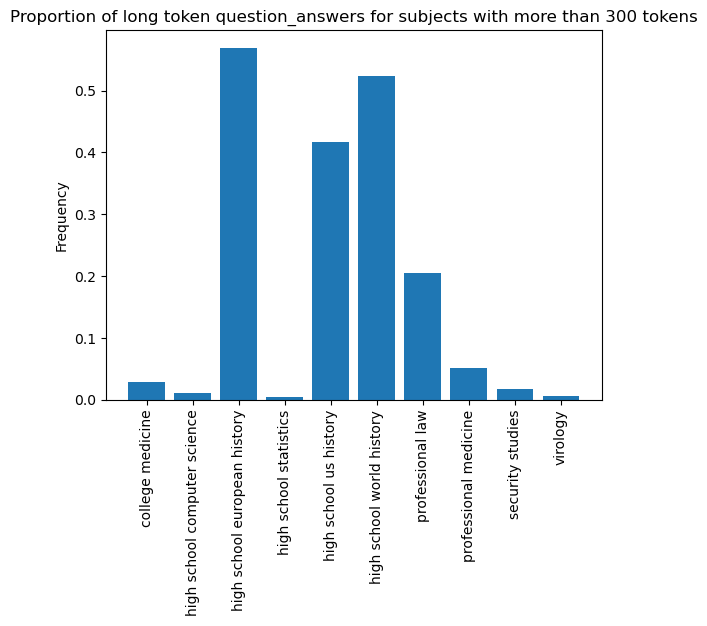

In [177]:
# A
# Filter the question-answers pair with more than 300 tokens
long_token_subject = df_test_token[df_test_token['total_number_tokens'] > 300].subject.value_counts()/df_test_token.subject.value_counts()
# Drop NaN values caused by the absence of large number of tokens for these subjects
long_token_subject = long_token_subject.dropna()
plt.bar(long_token_subject.index, long_token_subject.values)
plt.title('Proportion of long token question_answers for subjects with more than 300 tokens')
plt.xticks(rotation=90)
plt.ylabel('Frequency')



A. In our dataset, we see that subjects like 'Professional law', 'History' or 'Medecine' have a proportion of question_answers pair which often exceed the 300 tokens limit. In these cases, the cheaper model might be problematic.

B. For the problematic subjects, we could use the LMS models, which will have a better performance than the turbo model. For the other subjects, we could use the turbo model, which is cheaper and faster. This could be a good compromise between quality, costs and speed for the needs of the government. (Otherwise, we could only study mathematics and computer science to avoid this kind of problems with history and law :)

### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

**hint**
- Try to use the MECE framework: _Mutually Exclusive Collectively Exhaustive_

1. The computational power of LMs is directly tied to the number of tokens they need to process, forcing a trade-off between quality and cost/speed.

2. Using LMs across all fields may not be suitable, as it risks creating a two-speed system between humanity fields and sciences.

3. Biases have been observed within LMs, which could also influence learning if not addressed properly.

4. Even with the use of LMs, it is essential to verify the accuracy of results, and maintaining critical thinking among students remains crucial.